<a href="https://colab.research.google.com/github/jyPark1105/ML_DL_Study_Myself/blob/main/Chap%203-3_Feature%20Engineering%20%26%20Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3-3 : Feature Engineering and Regularization

### Introduction

        *농어의 무게를 예측하기 위해 농어의 길이와 제곱길이 특성을 훈련시켜 선형 회귀 모델을 만들었지만, Underfitting의 경향을 띔
        *김 팀장님께 받은 데이터인 길이, 높이, 두께 데이터들도 모두 사용하여 모델을 훈련시킬 필요가 있음
        
        **선형 회귀는 특성이 많을수록 엄청난 효과를 내므로 다항 회귀에 함께 적용하기 -> Scikit-learn의 PolynomialFeatures 클래스를 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ML_DL_Alone')

%load_ext autoreload
%autoreload 2

### Polynomial Regression

    하나의 특성만을 사용하여 모델을 훈련하는 선형 회귀 모델
                            vs
    여러 개의 특성을 사용하여 모델을 훈련하는 다중 회귀 모델

    각각의 장단점이 존재
___________________________________________________________________________
**다중 회귀**

    특성 2개를 학습하여 3차원 공간을 형성하고 선형 회귀의 2차 방정식의 형태는
    y = a * f1 + b * f2 + c의 평면 형태

    특히 특성이 많은 고차원 형태의 데이터의 경우는 선형 회귀보다는 다중 회귀를 사용하여 매우 복잡한 모델을 표현 가능

    길이, 제곱길이, 높이, 제곱높이, 두께, 제곱두께를 전부 특성으로 사용 가능하며 길이 x 높이 형태의 새로운 특성 또한 만들어서 모델을 더욱 복잡하게 만들 수 있음
    -> 이렇게 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업 = "특성 공학"

그러나 새로운 특성을 추가하는 것 대신, Scikit-learn에서 제공하는 편리한 도구를 사용할 것

### Preparation the Data

####**1. pandas**: 유명한 데이터 분석 라이브러리
####**2. dataframe**: pandas의 핵심 데이터 구조
    a. Numpy 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공
    b. Numpy 배열로 쉽게 바꿀 수 있음
___________________________________________________________________________
To do work
1. pandas를 사용해 농어 데이터를 인터넷에서 내려받기
2. Numpy 배열로 변환하여 선형 회귀 모델을 훈련(pandas dataframe을 만들기 위해 많이 사용하는 csv파일 사용)


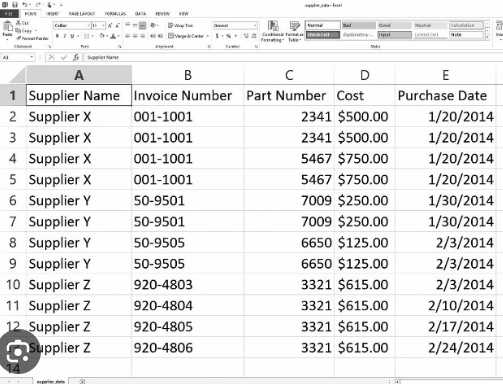




pandas에서 csv파일을 읽는 방법: 판다스의 read_csv() 함수에 "주소"를 전달하기

    csv 파일  --> 판다스 데이터프레임 --> 넘파이 배열
    word 파일 -->    pd.read_csv()    --> to_numpy()

In [ ]:
# 위의 과정을 코드로 구현하기

## 판다스 임포트
import pandas as pd # pd: 관례적으로 사용하는 별칭

## 판다스 데이터프레임
df = pd.read_csv('https://bit.ly/perch_csv_data')

## 넘파이 배열로 변환
perch_full = df.to_numpy()

print(perch_full)

In [ ]:
import numpy as np

"""
# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
"""

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### Scikit-learn의 변환기
* 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공

  이러한 클래스들을 변환기(Transformer)라고 함

* 모델 클래스(Estimator): fit(), score(), predict() 메서드

* **변환기 클래스(Transformer): fit(), transform()** 메서드

    fit 함수 이후 transform 함수 적용할 것(하나로 합친 fit_transform 메서드도 존재)
____________________
####PolynomialFeatures 클래스 변환기를 사용
(sklearn.preprocessing 패키지 하에 포함)

In [ ]:
# Transformer 포함하기
from sklearn.preprocessing import PolynomialFeatures

# 변환기 사용
poly = PolynomialFeatures()

# fit과 transform 메서드는 타깃 없이 입력 데이터만 전달
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

**PolynomialFeatures 클래스**

ex) [[2, 3]]
1. 각 특성값을 제곱한 항을 추가(4, 9)
2. 각 특성끼리 곱한 항을 추가(6)
3. 절편과 곱해지는 계수 1을 추가
__________________________________________
**무게 = a * 길이 + b * 높이 + c * 두께 + d * 1**
* 특성: 길이, 높이, 두께, 1
* Scikit-learn의 선형 모델: **자동으로 절편을 추가**하므로 inclue_bias=False로 지정하여 특성을 다시 변환

    (굳이 지정하지 않아도 Scikit-learn에서 알아서 절편 항을 무시함)

In [ ]:
# 절편을 위한 항(1값)이 제거되고 잔여 항들만 남음
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

In [ ]:
# 훈련 데이터 변환(입력 데이터에 그대로 적용)
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
# print(train_poly[:5])

9개의 열(특성)이 어떻게 만들어졌는지 알려주는 get_feature_names_out() 메서드

In [ ]:
poly.get_feature_names_out()

In [ ]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

    # fit() 메서드: 특성의 조합을 준비할 뿐 별도의 통계값을 구하지 않음
    # 따라서 테스트 세트를 따로 변환하여도 상관은 없으나, 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들일 것

### 다중 회귀 모델 훈련하기

    다중 회귀 모델: 여러 개의 독립적인 특성을 사용하여 선형 회귀 모델을 훈련하는 방식

In [ ]:
# 다중 회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 훈련하기
lr.fit(train_poly, train_target)

# 점수 출력
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

    1. Train score의 점수가 굉장히 높은 것으로 보아 선형 회귀 모델은 특성의 개수가 늘어나면 매우 강력한 것으로 판단
    2. Test score의 점수는 그대로이지만 농어의 길이만을 사용한 선형 회귀 모델에서의 Underfitting 문제는 사라짐

특성의 3제곱, 4제곱, 5제곱까지 사용하여 다중 회귀 모델 훈련 및 평가하기

In [ ]:
# 훈련 데이터 및 테스트 데이터 변환
poly = PolynomialFeatures(degree=5, include_bias=False) # 5제곱까지 특성 만들기
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

# 모델 훈련
lr.fit(train_poly, train_target)

# 점수 파악
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

    train_poly.shape: (42, 55)

    Train score: 0.9999999999996433
    Test score: -144.40579436844948

    Test score가 매우 큰 음수로 출력
    이유: 특성의 개수를 너무 크게 늘리면 선형 모델은 아주 복잡해지고 강력해짐
          훈련 세트에 너무 많이 Overfitting되었으므로 Test score가 엄청 낮은 음수값이 출력되는 것

          --> 모델 훈련에 사용되는 특성의 개수를 줄이기

              *42마리의 참새를 맞추기 위해 55번이나 새총을 쏘는 것과 다름 없음

### Regularization(규제)
1. 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

   즉, **과대적합을 막는 것**
2. 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일

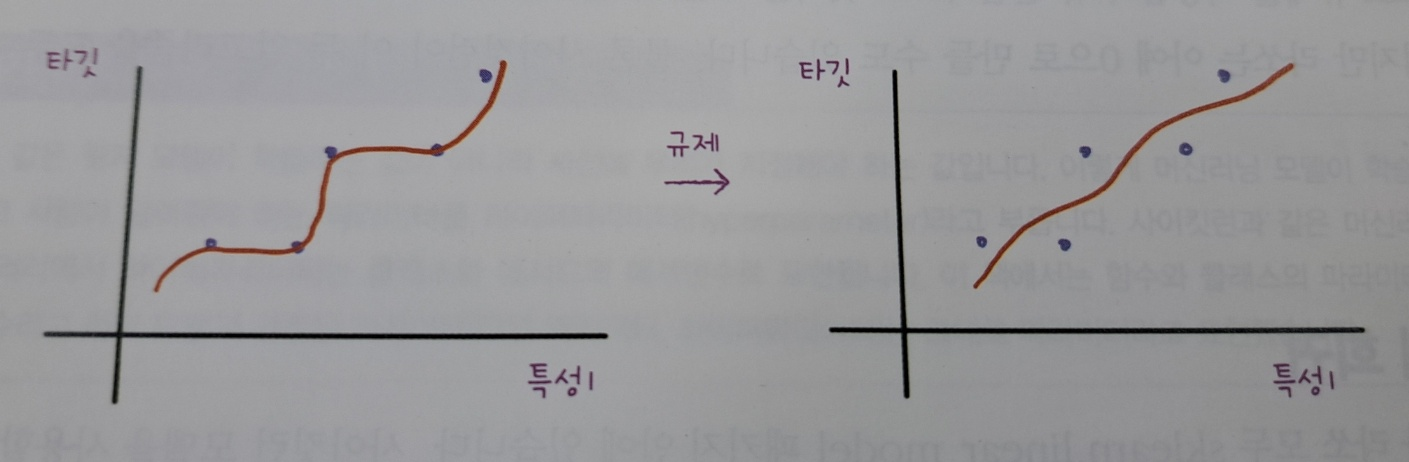

왼쪽: 모델이 훈련 데이터에 과대적합됨
오른쪽: 모델이 훈련 데이터에 적절히 적합됨

    앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고, 테스트 세트의 점수를 높이기

    특성의 스케일: 정규화되지 않으면 곱해지는 계수 값도 차이가 나게 됨

    일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어(규제)되지 않을 것
    
    --> 먼저 정규화 진행(스케일링)

Scikit-learn에서 제공하는 StandardScaler 클래스(변환기)를 사용하여 훈련 데이터와 테스트 데이터를 정규화하기

In [ ]:
# 정규화 클래스 임포트
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 정규화
ss.fit(train_poly) # 변환기 훈련시키기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

    훈련 세트에서 학습한 평균과 표준편차는 각 특성마다 StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장됨

선형 회귀 모델에 **규제(정규화 항)를 추가**한 모델

* **Ridge**
* **Lasso**

 두 회귀 모두 sklearn.linear_model 패키지 안에 있음
_________________________________________________
####**Ridge**
1. **계수의 제곱값**을 기준으로 규제를 적용
2. **계수의 크기를 줄이는 모델**
3. 일반적으로 **조금 더 선호**하는 모델

####**Lasso**
1. **계수의 절댓값**을 기준으로 규제를 적용
2. **계수의 크기를 줄이고 값을 0으로 만들 수도 있는 모델**




### Ridge Regression

    1. Ridge 클래스를 임포트하기
    2. Ridge 클래스의 객체를 생성하고, 그 객체(모델)를 훈련시키기
    3. 훈련한 모델의 Train score 값과 Test score 값을 비교하여 과대적합 및 과소적합 여부 확인

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

# ridge 모델 훈련 및 훈련 점수 파악
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

# 테스트 점수 파악
print(ridge.score(test_scaled, test_target))

* 많은 특성을 사용했음(모델 복잡성 증가)에도 훈련 세트에 과대적합되지 않음
* 테스트 세트에서도 좋은 성능을 냄

_______________________________
**Ridge 모델과 Lasso 모델을 사용할 때 규제의 양을 조절 가능**(Hyperparameter인 alpha 매개변수를 사전에 우리가 지정)

Large alpha : 규제 강도 세짐, 계수 값을 더 줄이고 underfitting 유도
    
Small alpha : 규제 강도 약해짐, 계수 값을 덜 줄이고 이는 선형 회귀 모델과 유사해지므로 overfitting 유도
_____________________________
####**Hyperparameter**
1. 모델이 훈련하는 값이 아닌 사전에 우리가 지정해야 하는 값
2. 머신러닝 라이브러리에서 클래스와 메서드의 매개변수로 표현

    최적의 alpha값을 찾는 방법: alpha에 대한 R^2값의 그래프를 그리기
    -> 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점: 최적의 alpha

In [ ]:
# 그래프 그리기 위해 임포트
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
# alpha 저장소
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

# alpha 값에 따라 Ridge 모델을 훈련 -> 훈련 점수와 테스트 점수를 파이썬 리스트에 저장
for alpha in alpha_list:

    # 모델 생성
    ridge = Ridge(alpha=alpha)

    # 모델 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

그래프 그리기
1. alpha: 0.001 ~ 100까지 늘리기 때문에 log10을 취해서 동일한 간격으로 나타내기
2. np.log() -> 밑이 e인 자연로그
3. np.log10() -> 밑이 10인 상용로그

In [ ]:
plt.plot(np.log10(alpha_list), train_score, c='b')
plt.plot(np.log10(alpha_list), test_score, c='m')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

    Ridge Graph

    1. Left : train score와 test score의 gap이 너무 큼 -> Overfitting
    2. Right : train score와 test score 모두 낮음 -> Underfitting
    3. Mid : train score와 test score의 gap이 작으며, test score의 최댓값을 가지게 하는 최적의 alpha 값을 가지는 구간

    즉, log(alpha) = -1 --> "alpha = 0.1"로 최종 모델 훈련

####최종 Ridge 모델 학습

In [ ]:
# 최적의 하이퍼파라미터를 통한 모델 학습
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

### Lasso Regression

**클래스 Ridge -> Lasso로 바꾸는 것이 전부**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

    1. Train score와 Test score 모두 Ridge 모델만큼 좋음
    2. Lasso도 alpha 초매개변수를 조절하며 최적의 하이퍼파라미터 값을 구할 수 있음.(규제 강도 조절)

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:

    # 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # 모델 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

    Lasso 모델을 훈련할 때 ConvergenceWarning이라는 경고가 발생할 수 있음.

    1. Lasso 모델은 최적의 계수를 찾기 위해 반복적 계산을 수행하는데, 지정한 반복 횟수인 max_iter 초매개변수 값이 작으면 이런 경고가 발생함
    2. 반복 횟수를 충분히 늘리기 위해 max_iter 초매개변수의 값을 10000으로 지정. 필요하면 더 늘릴 수 있음


In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

    Lasso Graph

    1. Left : train score와 test score의 gap이 너무 큼 -> Overfitting
    2. Right : train score와 test score 모두 현저히 낮음 -> Underfitting
    3. Mid : train score와 test score의 gap이 작으며, test score의 최댓값을 가지게 하는 최적의 alpha 값을 가지는 구간

    즉, log(alpha) = 1 --> "alpha = 10"로 최종 모델 훈련

In [ ]:
# 최적의 하이퍼파라미터를 통한 모델 학습
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

Lasso

1. Ridge 모델과 마찬가지로 Lasso 모델이 Overfitting을 잘 억제하고 Test set의 성능을 크게 높임
2. Lasso 모델은 계수 값 -> 0으로 만들 수 있음. coef_ 속성을 통해 0인 것을 찾아내기

In [ ]:
# 계수 = 0을 만족하는 feature 찾아내기
print(np.sum(lasso.coef_==0))

# np.sum(): True == 1, False == 0이므로 개수 셀 때 용이

    55개의 특성을 Lasso 모델에 주입하였지만, 실제로 사용된 특성의 개수는 15개.
    Lasso Regression(Lasso Regularization)를 통해 모델의 과대적합 가능성을 줄일 수 있었음.

### 문제 해결 과정
**모델의 과대적합 제어하기**
1. 선형 회귀: 훈련 세트에 과소적합 문제

2. 다항 회귀: 너무 많은 특성으로 인한 과대적합 문제

3. 규제: 릿지 회귀와 라쏘 회귀를 사용한 과대적합과 과소적합 방지

   (이 과정에서 최적의 alpha 값을 구해 완벽한 모델 규제를 할 수 있었음)

### 마무리

1. Keywords
    * **Polynomial Regression** : 여러 개의 특성을 사용하는 회귀 모델

    특성이 많으면 선형 회귀는 강력한 성능을 발휘

    * **Feature Engineering** : 주어진 feature를 조합하여 새로운 feature를 만드는 일련의 작업 과정(예: 길이 x 높이 특성)

    * **Ridge Regresion** : 규제가 있는 선형 회귀 모델이며 선형 모델의 계수를 작게 만들어 모델의 과대적합을 완화함

        비교적 효과가 좋아 널리 사용하는 규제 방법

    * **Lasso Regression** : 규제가 있는 또 다른 선형 회귀 모델이며 Ridge 모델과 달리 **계수 값을 아예 0으로 만들 수 있음
    
     --> 덜 복잡한 모델을 만들어 Overfitting 완화 가능**

2. 핵심 package와 function
    * **pandas**
     * **read_csv()** : CSV File을 로컬 컴퓨터나 인터넷에서 읽어 pandas dataframe으로 변환하는 함수, 매우 많은 매개변수를 제공해줌

     * Parameters
        1. sep : CSV File의 구분자를 지정(기본값: 콤마(,))
        2. header : 데이터프레임의 열 이름으로 사용할 CSV File의 행 번호를 지정(기본적으로 첫 번째 Column name으로 사용)
        3. skiprows : File에서 읽기 전에 건너뛸 행의 개수를 지정
        4. nrows : File에서 읽을 행의 개수를 지정

    * scikit-learn
     * **PolynomialFeatures** : 주어진 특성을 조합하여 새로운 특성을 만드는 클래스. Transformer라고도 불림

        1. degree : 최고 차수를 지정(기본값 = 2)
        2. interaction_only : True 값이면 거듭제곱 항은 제외되고 feature 간의 곱셈 항만 추가(기본값 = False)
        3. include_bias : False 값이면 절편을 위한 feature(1값)를 추가하지 않음(기본값 = True)

     * **Ridge** : 규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련하는 클래스
        1. alpha : 규제의 강도를 조절하도록 사전에 지정하는 초매개변수(기본값 = 1)

            * alpha ↑ -> 규제 세짐, Underfitting 가능성 O

            * alpha ↑ -> 규제 약해짐, Overfitting 가능성 O

        2. solver : 최적의 모델을 찾기 위한 방법을 지정하는 초매개변수(기본값 = 'auto')

            * 데이터에 따라 자동으로 선택됨
            * 'sag' : 확률적 평균 경사하강법 알고리즘으로 feature과 sample 수가 많을수록 성능이 빠르고 좋아짐

            (Scikit-learn 0.17 version에 추가된)
            * 'saga' : Scikit-learn 0.19 version에 'sag'의 개선 버전으로 추가됨

            * random_state : solver = 'sag' or 'saga'일 때 Numpy random seed 값 지정

    * **Lasso** : 규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련하는 클래스

      1. 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 **좌표 하강법을 사용**
      2. alpha, random_state : Ridge 클래스와 동일
      3. max_iter : 모델 훈련의 수행 반복 횟수를 지정(기본값 = 1000)